# Sentiment Analysis

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data.head()

,author_name,content
aditya,Aditya Hadi Pratama,cialfo a singaporebased edtech startup has rai...
daniel,Daniel Rouquette,this is the daily news roundup delivered every...
deepti,Deepti Sri,singaporebased insurtech firm igloo has raised...
kul,Kul Bhushan,indiabased loco a streaming platform for video...
miguel,Miguel Cordon,singaporebased silent eight a startup offering...


In [2]:
# Create quick lambda functions to find the polarity and subjectivity of each author

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['content'].apply(pol)
data['subjectivity'] = data['content'].apply(sub)
data.head()

,author_name,content,polarity,subjectivity
aditya,Aditya Hadi Pratama,cialfo a singaporebased edtech startup has rai...,0.062339,0.365868
daniel,Daniel Rouquette,this is the daily news roundup delivered every...,0.084074,0.401093
deepti,Deepti Sri,singaporebased insurtech firm igloo has raised...,0.062770,0.369840
kul,Kul Bhushan,indiabased loco a streaming platform for video...,0.055559,0.361121
miguel,Miguel Cordon,singaporebased silent eight a startup offering...,0.053775,0.369153


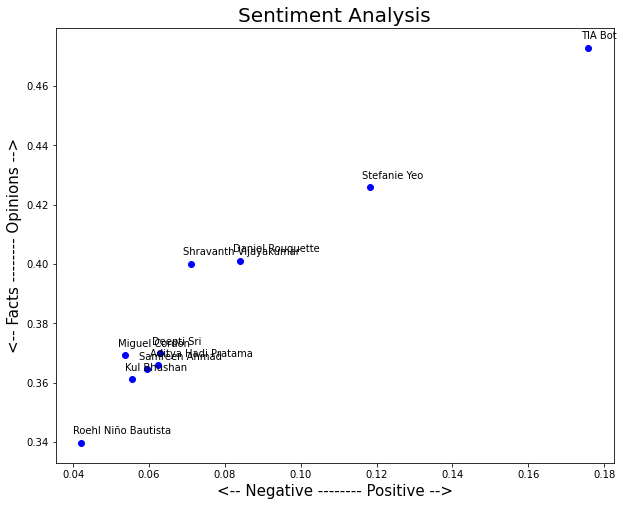

In [3]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, author in enumerate(data.index):
    x = data.polarity.loc[author]
    y = data.subjectivity.loc[author]
    plt.scatter(x, y, color='blue')
    plt.text(x-.002, y+.003, data['author_name'][index], fontsize=10)
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

# Sentiment Over Time

In [4]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [5]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.content:
    split = split_text(t)
    list_pieces.append(split)

In [6]:
# The list has 10 elements, one for each content
len(list_pieces)

10

In [7]:
# Each content has been split into 10 pieces of text
len(list_pieces[0])

10

In [8]:
# Calculate the polarity for each piece of text

polarity_content = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_content.append(polarity_piece)
    
polarity_content

[[0.07987965367965374,
  0.06937280728749924,
  0.056531242879927085,
  0.023673168279909833,
  0.0420778141611475,
  0.06040905173258115,
  0.07544942077652357,
  0.08458467525496514,
  0.07780447330447336,
  0.04947561327561326],
 [0.06715997181113459,
  0.13177860696517413,
  0.07946689113355777,
  0.09701595031952176,
  0.0926732905648568,
  0.07695642650999794,
  0.09056081093118132,
  0.07542766005923901,
  0.06355647062964136,
  0.07942720859387525],
 [0.07391747869275962,
  0.065729380942147,
  0.04858591972998755,
  0.04662661298463773,
  0.06464890214890222,
  0.07704677468264423,
  0.09784539390570528,
  0.035392803917394064,
  0.04629034414748706,
  0.063252262178255],
 [0.081759866347245,
  0.04173246957445067,
  0.07346776030986567,
  0.05897213897213899,
  0.026318344250281418,
  0.04659831396673503,
  0.04941698208713913,
  0.05444418676561534,
  0.06328880643166361,
  0.06117349501327404],
 [0.02948542343073593,
  0.0798739443616493,
  0.049735077129443334,
  0.0353140

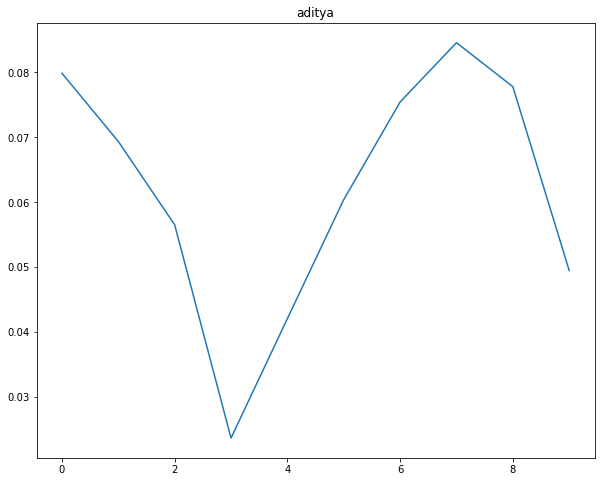

In [9]:
# Show the plot for one author
plt.plot(polarity_content[0])
plt.title(data['author_name'].index[0])
plt.show()

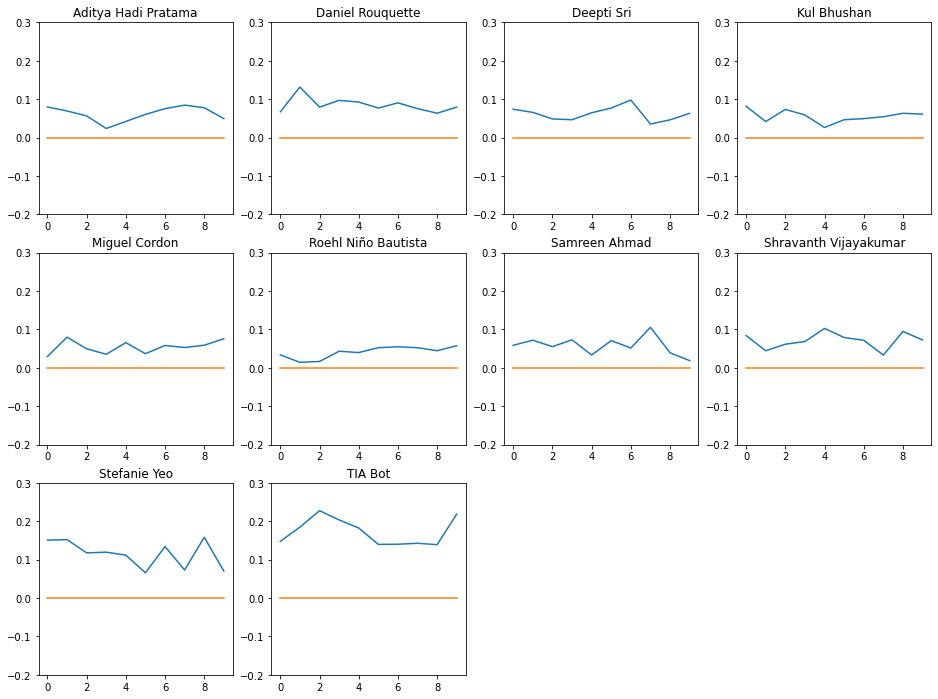

In [10]:
# Show the plot for all authors
plt.rcParams['figure.figsize'] = [16, 12]

for index, author in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_content[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['author_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

## Findings

- Most of the times authors write a positive articles, and TIA bots always above 0.1
- Not really find anything useful, but still great visualizing how positive/negative each author write articles.